In [1]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from pylab import rcParams
import networkx as nx
from gensim.models import Word2Vec
import gensim
import numpy as np

In [2]:
df_sbert = pd.read_csv("sBERT_features.csv")

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

X_data = df_sbert[df_sbert.columns[1:-3]]
y_data = df_sbert['label']
# X_train, X_test, y_train, y_test = train_test_split(X_data,
#                             y_data, stratify=y_data, #keep the same ratio
#                             test_size=0.1,
#                             random_state=42)

In [5]:
## lasso - logistics - label - all features

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd

In [7]:
#define cross-validation method to use
cv = LeaveOneOut()

#build multiple linear regression model
model = LogisticRegression(random_state=42, fit_intercept = True, solver = "liblinear", penalty ="l1")

#use LOOCV to evaluate model
scores = cross_val_score(model, X_data, y_data, scoring = 'accuracy', cv=cv, n_jobs=-1)

#view mean absolute error
mean(absolute(scores))

0.7551282051282051

In [8]:
## Ridge - logistics - label - all features

In [9]:
#define cross-validation method to use
cv = LeaveOneOut()

#build multiple linear regression model
model =  LogisticRegression(random_state=42, fit_intercept = True, penalty ="l2")

#use LOOCV to evaluate model
scores = cross_val_score(model, X_data, y_data, scoring = 'accuracy', cv=cv, n_jobs=-1)

#view mean absolute error
mean(absolute(scores))

0.7589743589743589

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
X_data = df_sbert[df_sbert.columns[1:-3]]
y_data = df_sbert['rating']

In [23]:
#define cross-validation method to use
cv = LeaveOneOut()
y_true = []
y_pred = []
for train_ix, test_ix in cv.split(X_data):
# split data
    X_train, X_test = X_data.iloc[train_ix, :], X_data.iloc[test_ix, :]
    y_train, y_test = y_data.iloc[train_ix], y_data.iloc[test_ix]
# fit model
    model = LinearRegression(fit_intercept = True)
    model.fit(X_train, y_train)
 # evaluate model
    yhat = model.predict(X_test)
    # store
    y_true.append(y_test.iloc[0])
    y_pred.append(yhat[0])
# # calculate accuracy
# acc = accuracy_score(y_true, y_pred)
# print('Accuracy: %.3f' % acc)

In [24]:
import numpy as np
import scipy.stats
scipy.stats.pearsonr(y_pred, y_true)

(0.5893442766058454, 3.9956922500457e-74)

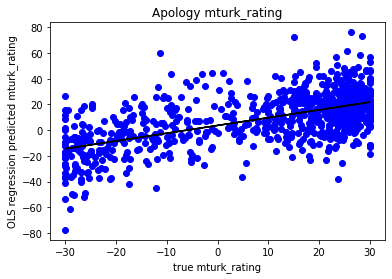

In [27]:
# Visualising the Test set results
theta = np.polyfit(y_true, y_pred, 1)
y_line = theta[1] + theta[0] * np.array(y_true)
plt.scatter(y_true, y_pred, color = 'blue')
plt.plot(y_true, y_line, 'black')
plt.title('Apology mturk_rating')
plt.xlabel('true mturk_rating')
plt.ylabel('OLS regression predicted mturk_rating')
plt.show()

In [28]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

In [29]:
#define cross-validation method to use
cv = LeaveOneOut()
y_true = []
y_pred = []
for train_ix, test_ix in cv.split(X_data):
# split data
    X_train, X_test = X_data.iloc[train_ix, :], X_data.iloc[test_ix, :]
    y_train, y_test = y_data.iloc[train_ix], y_data.iloc[test_ix]
# fit model
    model = Ridge(alpha=0.001)
    model.fit(X_train, y_train)
 # evaluate model
    yhat = model.predict(X_test)
    # store
    y_true.append(y_test.iloc[0])
    y_pred.append(yhat[0])
# # calculate accuracy
# acc = accuracy_score(y_true, y_pred)
# print('Accuracy: %.3f' % acc)


In [30]:
import numpy as np
import scipy.stats
scipy.stats.pearsonr(y_pred, y_true)

(0.6073638143027614, 8.17651867885591e-80)

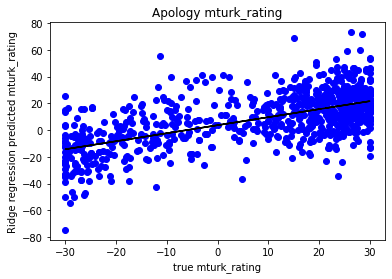

In [32]:
# Visualising the Test set results
theta = np.polyfit(y_true, y_pred, 1)
y_line = theta[1] + theta[0] * np.array(y_true)
plt.scatter(y_true, y_pred, color = 'blue')
plt.plot(y_true, y_line, 'black')
plt.title('Apology mturk_rating')
plt.xlabel('true mturk_rating')
plt.ylabel("Ridge regression predicted mturk_rating")
plt.show()

In [33]:
#define cross-validation method to use
cv = LeaveOneOut()
y_true = []
y_pred = []
for train_ix, test_ix in cv.split(X_data):
# split data
    X_train, X_test = X_data.iloc[train_ix, :], X_data.iloc[test_ix, :]
    y_train, y_test = y_data.iloc[train_ix], y_data.iloc[test_ix]
# fit model
    model = Lasso(alpha=0.001)
    model.fit(X_train, y_train)
 # evaluate model
    yhat = model.predict(X_test)
    # store
    y_true.append(y_test.iloc[0])
    y_pred.append(yhat[0])
# # calculate accuracy
# acc = accuracy_score(y_true, y_pred)
# print('Accuracy: %.3f' % acc)


In [34]:
import numpy as np
import scipy.stats
scipy.stats.pearsonr(y_pred, y_true)

(0.654754461480556, 1.14464205322851e-96)

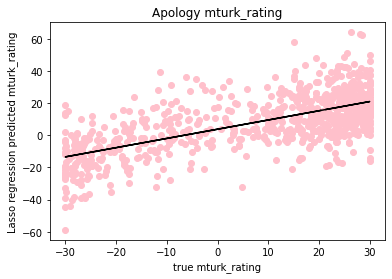

In [36]:
# Visualising the Test set results
theta = np.polyfit(y_true, y_pred, 1)
y_line = theta[1] + theta[0] * np.array(y_true)
plt.scatter(y_true, y_pred, color = 'pink')
plt.plot(y_true, y_line, 'black')
plt.title('Apology mturk_rating')
plt.xlabel('true mturk_rating')
plt.ylabel("Lasso regression predicted mturk_rating")
plt.show()